# 階層的クラスタリング（Hierarchical Clustering）

## 前準備

In [1]:
# 日本語を含むグラフ表示で邪魔な警告文が出る可能性があるので，一時的に抑制
options(warn=-1)

In [2]:
# クラスタに対して集約演算を行うためのライブラリ
library(dplyr)

# グラフに色をつけるためのライブラリ
library(RColorBrewer)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



---
## 演習課題

### 課題1
上記例題2では，各指標によってデータのばらつき方の幅やデータの最大値・最小値に差があります．例えば，安打数は最大値が195に対して，打率は最大値が0.363で，安打数と打率では最大値が500倍以上異なります．そのため，選手（ベクトル）間の距離を計算する際に，打率の影響が小さくなり，結果としてクラスタリングの精度に影響が出る可能性があります．

このような問題を回避するために，通常データに対して**正規化**という処理が施されます．
正規化とは「各指標のデータのばらつきが平均0，分散1の正規分布にしたがうようにデータを変換する操作」だと思ってください．
正規化をすることによって，指標間で単位の違いやばらつきの違いが分析結果に及ぼす悪影響を小さくできます．

Rには表データを指標ごとに正規化する``scale``関数が用意されています．
以下のように``scale``関数を使って，例題2のデータを変換し，再度階層的クラスタリングを行ってください．

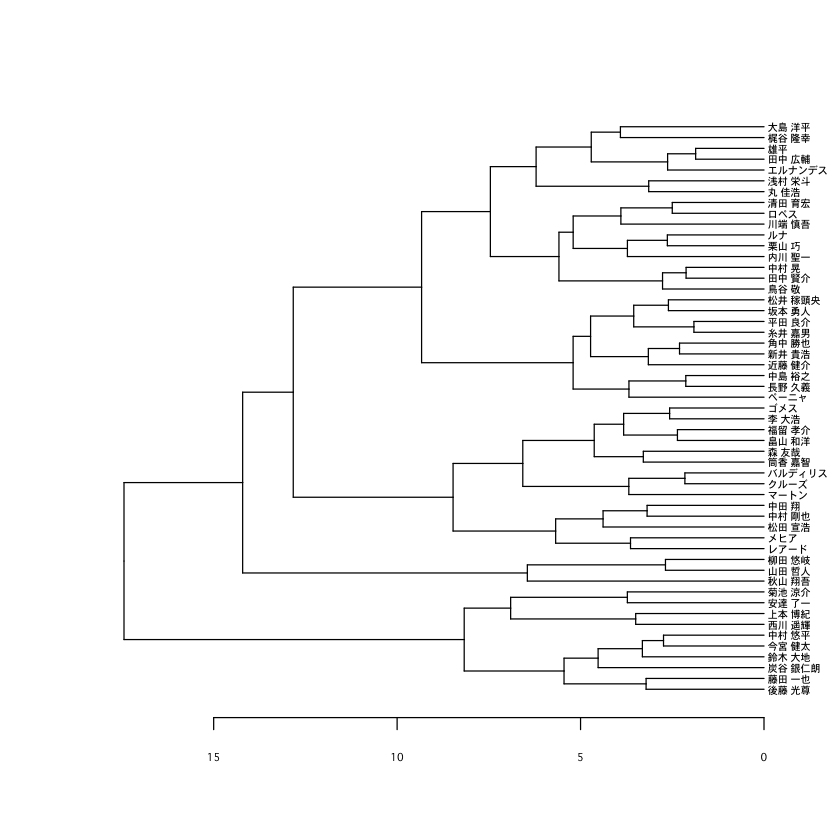

In [3]:
# データのロード
stats_df <- read.table("data/baseball-stats-2018.tsv", header=T, sep="\t", row.names='選手名')

# 距離行列の計算
scaled_stats_dist_matrix = dist(scale(stats_df[, 2:17]))

# 階層的クラスタリングの実行
scaled_stats_result = hclust(d=scaled_stats_dist_matrix, method="ward.D2")

# 日本語を含むデンドログラムの表示設定
par(family = "Osaka", ps=6)

# デンドログラムの表示
plot(as.dendrogram(scaled_stats_result), horiz=TRUE)

In [4]:
# 4つのクラスタに分割
scaled_stats_cluster <- cutree(tree=scaled_stats_result, k=4)

# クラスタ情報と選手データを結合
new_scaled_stats_df <- cbind(scaled_stats_cluster, stats_df)

# 各クラスタの平均スコアを計算
new_scaled_stats_df %>%
    dplyr::group_by(scaled_stats_cluster) %>% # e_commerce_clusterごとにデータをまとめる
    dplyr::summarise_all(funs(mean)) # まとめたデータについて，各指標の平均値を計算

scaled_stats_cluster,チーム,打率,打席数,打数,安打数,ホームラン数,打点,盗塁,盗塁刺,盗塁成功率,犠打,犠飛,四球,三振,併殺打,出塁率,長打率
1,NA,0.3503333,642.0000,553.6667,193.6667,28.66667,84.66667,27.6666667,9.666667,0.7316667,2.33333333,2.000000,76.33333,96.66667,8.666667,0.4346667,0.5876667
2,NA,0.2706429,569.2143,505.7857,137.0000,24.00000,86.14286,0.8571429,1.357143,0.2697857,0.07142857,4.642857,53.64286,111.78571,12.785714,0.3430714,0.4691429
3,NA,0.2786538,562.8462,496.9615,138.7308,10.80769,56.61538,8.3846154,3.961538,0.6710000,3.53846154,2.923077,55.15385,85.07692,10.000000,0.3540385,0.4047308
4,NA,0.2462000,514.4000,447.5000,110.3000,6.10000,40.10000,11.2000000,6.300000,0.5252000,24.30000000,2.800000,35.80000,71.30000,7.000000,0.3054000,0.3365000


### 課題2

[K-meansクラスタリングの例題2](https://github.com/trycycle/data-analysis-lecture-2019/blob/master/notebook/k-means.ipynb)で用いた2次元データに対して，階層的クラスタリングを実行して，データを**10のクラスタ**に分割し，クラスタリング結果を色分けして散布図表示してください．その際，階層的クラスタリングのタイプとして，
* 最長距離法（complete）
* 最短距離法（single）
* セントロイド法（centroid）
* ウォード法（ward.D2）

の4つを指定し，それぞれの結果を比較してみてください．

参考までにK-Meansクラスタリングのコードを以下に記しておきます．

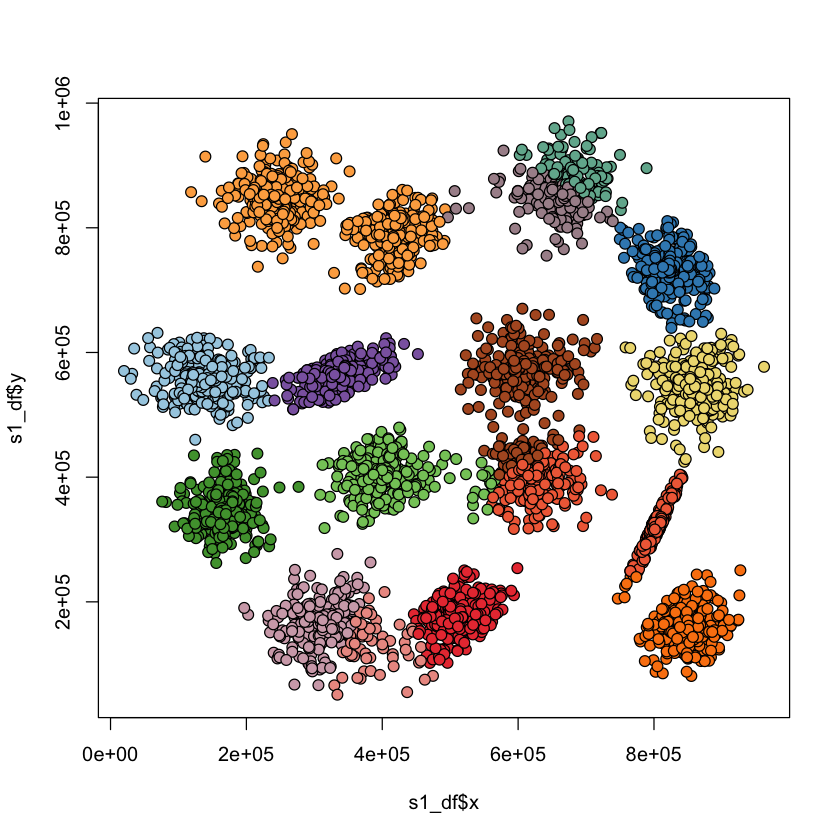

In [5]:
s1_df <- read.table("data/S-sets-s1.tsv", header=T, sep="\t")

cluster_num <- 15
result_s1 <- kmeans(s1_df, centers=cluster_num)

# クラスタ数に応じて色を準備
colors <- colorRampPalette(brewer.pal(12, "Paired"))(cluster_num)

plot(
    s1_df$x, s1_df$y, 
    cex = 1.2, # グラフ上の点の大きさ
    pch = 21,  # 点の形を丸にする
    bg = colors[unclass(result_s1$cluster)] # クラスタリング結果に応じて色分け
)

In [6]:
s1_df <- read.table("data/S-sets-s1.tsv", header=T, sep="\t")
cluster_num <- 10

# クラスタ数に応じて色を準備
colors <- colorRampPalette(brewer.pal(12, "Paired"))(cluster_num)

# 距離行列の計算
dist_matrix = dist(s1_df, method='euclidean')

#### 最短距離法

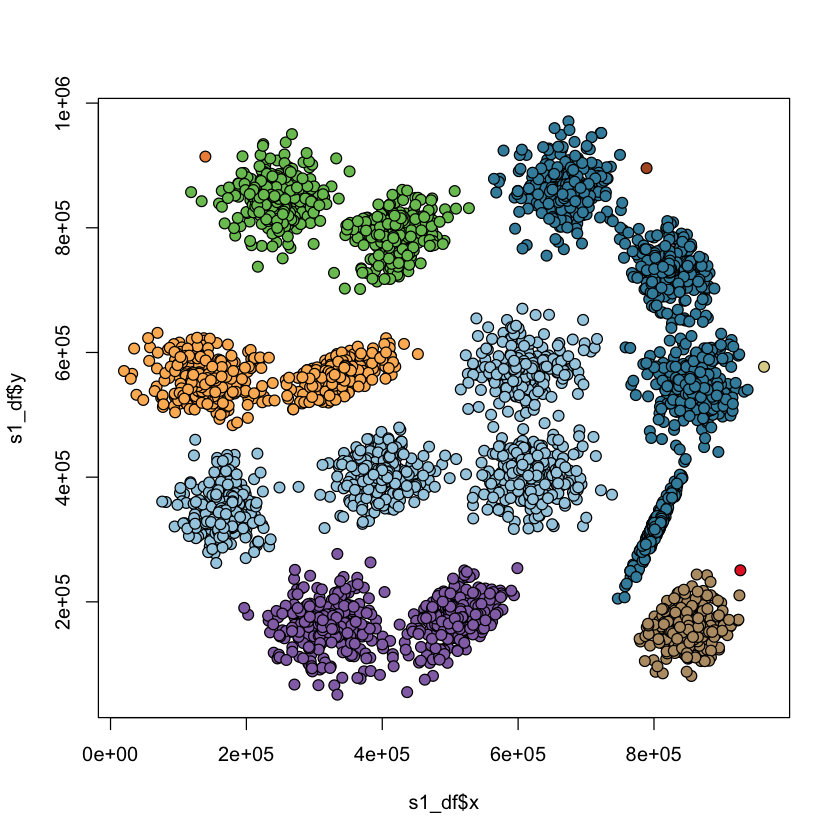

In [7]:
# 階層的クラスタリングの実行
single_linkage_result = hclust(d=dist_matrix, method="single")

# 10つのクラスタに分割
single_linkage_cluster <- cutree(tree=single_linkage_result, k=cluster_num)

plot(
    s1_df$x, s1_df$y, 
    cex = 1.2, # グラフ上の点の大きさ
    pch = 21,  # 点の形を丸にする
    bg = colors[unclass(single_linkage_cluster)] # クラスタリング結果に応じて色分け
)

#### 最長距離法

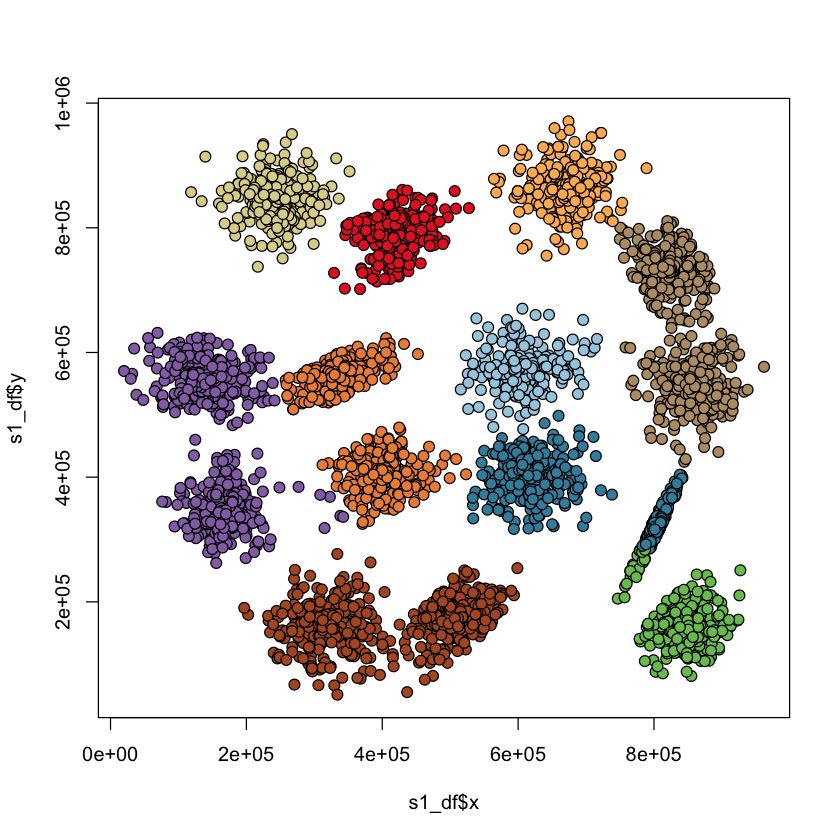

In [8]:
# 階層的クラスタリングの実行
complete_linkage_result = hclust(d=dist_matrix, method="complete")

# 10つのクラスタに分割
complete_linkage_cluster <- cutree(tree=complete_linkage_result, k=cluster_num)

plot(
    s1_df$x, s1_df$y, 
    cex = 1.2, # グラフ上の点の大きさ
    pch = 21,  # 点の形を丸にする
    bg = colors[unclass(complete_linkage_cluster)] # クラスタリング結果に応じて色分け
)

#### セントロイド法

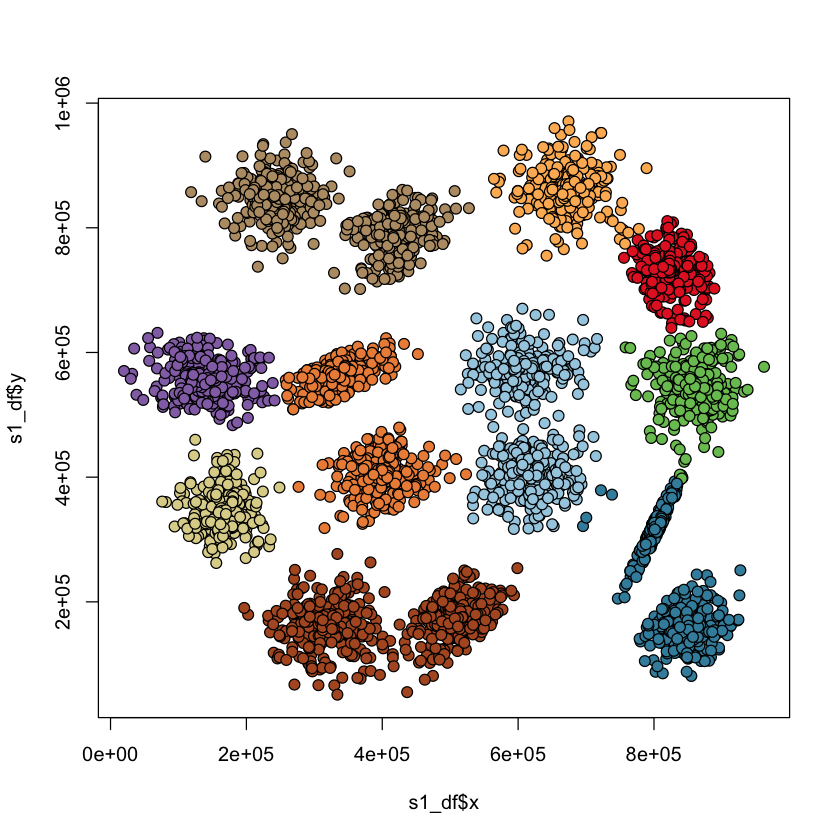

In [9]:
# 階層的クラスタリングの実行
centroid_result = hclust(d=dist_matrix, method="centroid")

# 10つのクラスタに分割
centroid_cluster <- cutree(tree=centroid_result, k=cluster_num)

plot(
    s1_df$x, s1_df$y, 
    cex = 1.2, # グラフ上の点の大きさ
    pch = 21,  # 点の形を丸にする
    bg = colors[unclass(centroid_cluster)] # クラスタリング結果に応じて色分け
)

#### ウォード法

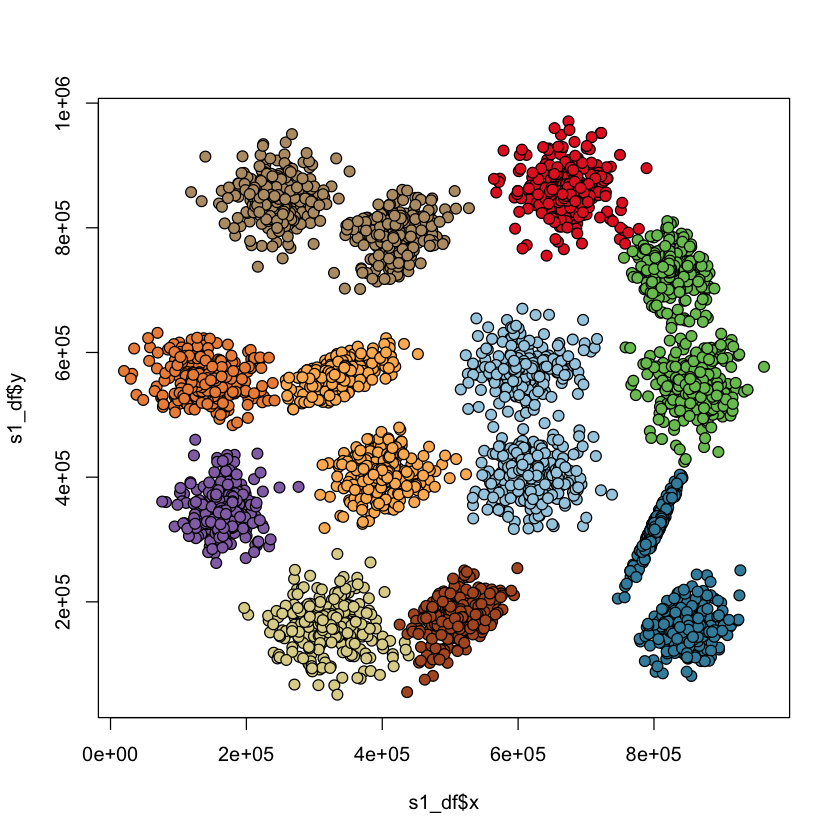

In [10]:
# 階層的クラスタリングの実行
ward_result = hclust(d=dist_matrix, method="ward.D2")

# 10つのクラスタに分割
ward_cluster <- cutree(tree=ward_result, k=cluster_num)

plot(
    s1_df$x, s1_df$y, 
    cex = 1.2, # グラフ上の点の大きさ
    pch = 21,  # 点の形を丸にする
    bg = colors[unclass(ward_cluster)] # クラスタリング結果に応じて色分け
)

### 課題3
``data/beer-questionnaire``フォルダの``answer.tsv``ファイルは，主要なビールに対する消費者の感想を記録したアンケートデータものです．アンケートの具体的項目は同じフォルダの``質問項目.xls``ファイルに記されています．``answer.tsv``ファイルの各行はアンケート回答者に対応し，各列はアンケート項目に対応します．

列24から列83までは「Q3: アサヒスーパードライは喉越しが良い？」という質問から「Q6: サントリー金星は好きなブランドである？」までの質問に対する回答が5段階で記録されています．この列24から列83までの指標を対象に，アンケート回答者を階層的クラスタリングして，各クラスタの特徴を分析してみてください．

#### 分析の流れ
1. デンドログラムを表示する
2. 分割するクラスタ数を適当に決める
3. 各クラスタの平均スコアを算出する
4. ``質問項目.xls``と見比べながら，各クラスタがどのような特徴を持っているかを考察してみる


#### 備考
本データは書籍「マーケティングのデータ分析」の[サポートページ](https://www.asakura.co.jp/books/isbn/978-4-254-12822-2/)にて公開されているデータです．

In [11]:
# データの読み込み
beer_df <- read.table("data/beer-questionnaire/answer.tsv", header=T, sep="\t")

# Q3(列24) ~ Q6(列83)までのデータを抽出
beer_df[, 24:83]

Q3.1_喉越しが良い,Q3.1_香りが良い,Q3.1_味が良い,Q3.2_喉越しが良い,Q3.2_香りが良い,Q3.2_味が良い,Q3.3_喉越しが良い,Q3.3_香りが良い,Q3.3_味が良い,Q3.4_喉越しが良い,⋯,Q6.1_このブランドは.総合的にみて良いブランドである,Q6.1_このブランドは.好きなブランドである,Q6.2_このブランドは.総合的にみて良いブランドである,Q6.2_このブランドは.好きなブランドである,Q6.3_このブランドは.総合的にみて良いブランドである,Q6.3_このブランドは.好きなブランドである,Q6.4_このブランドは.総合的にみて良いブランドである,Q6.4_このブランドは.好きなブランドである,Q6.5_このブランドは.総合的にみて良いブランドである,Q6.5_このブランドは.好きなブランドである
1,2,3,3,3,5,3,3,5,1,⋯,2,5,3,5,3,5,1,1,5,5
1,2,1,2,1,1,1,1,1,1,⋯,1,1,1,1,1,1,3,3,4,4
3,3,3,2,3,2,1,1,1,2,⋯,2,4,3,3,1,1,1,1,4,4
1,2,1,1,1,1,1,1,1,2,⋯,1,1,1,1,1,1,2,2,2,1
3,3,3,3,3,3,3,3,3,3,⋯,3,5,3,5,3,5,3,5,3,5
2,2,2,2,2,2,1,1,1,2,⋯,2,2,2,2,1,1,2,2,3,3
1,2,2,1,2,2,2,1,1,1,⋯,2,2,2,2,2,2,3,3,2,3
1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,2,2
1,2,1,2,2,2,2,2,2,1,⋯,1,1,3,3,2,2,2,2,3,3
1,2,1,3,3,3,3,2,3,2,⋯,2,1,2,3,2,3,3,3,3,3


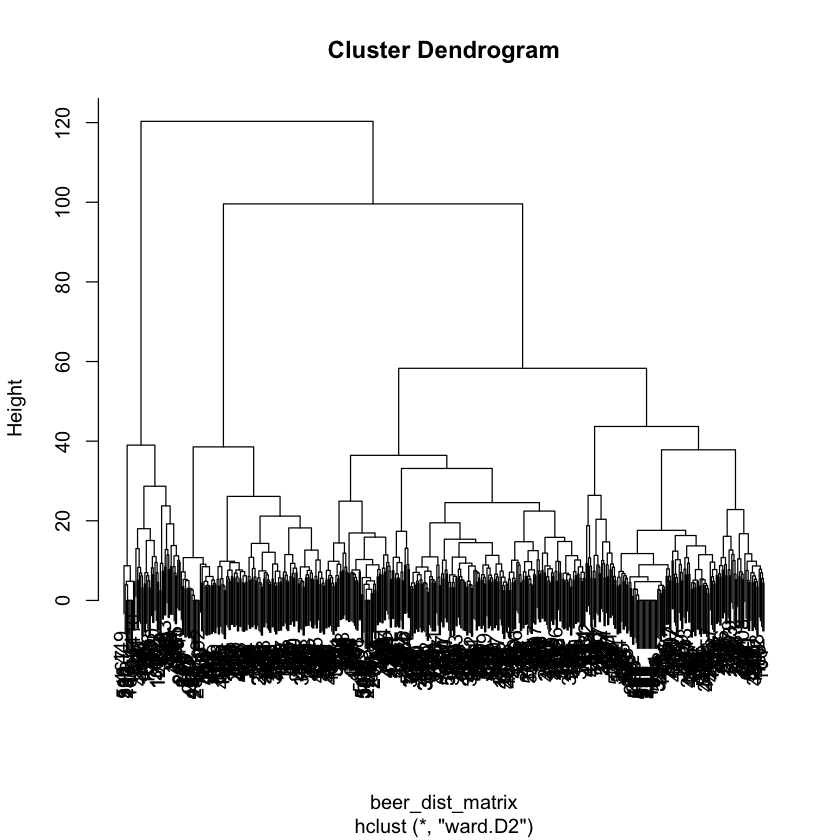

In [12]:
# データの読み込み
beer_df <- read.table("data/beer-questionnaire/answer.tsv", header=T, sep="\t")

# Q3(列24) ~ Q6(列83)までのデータを抽出し，距離行列を計算
beer_dist_matrix = dist(beer_df[, 24:83], method='euclidean')

# ウォード法で階層的クラスタリング
beer_result = hclust(d=beer_dist_matrix, method="ward.D2")

# デンドログラムの表示
plot(beer_result)

In [13]:
# 4つのクラスタに分割
beer_cluster <- cutree(tree=beer_result, k=4)

# クラスタ情報とアンケートデータを結合
new_beer_df <- cbind(beer_cluster, beer_df[, 24:83])

# 各クラスタの平均スコアを計算
new_beer_df %>%
    dplyr::group_by(beer_cluster) %>% # e_commerce_clusterごとにデータをまとめる
    dplyr::summarise_all(funs(mean)) # まとめたデータについて，各指標の平均値を計算

beer_cluster,Q3.1_喉越しが良い,Q3.1_香りが良い,Q3.1_味が良い,Q3.2_喉越しが良い,Q3.2_香りが良い,Q3.2_味が良い,Q3.3_喉越しが良い,Q3.3_香りが良い,Q3.3_味が良い,⋯,Q6.1_このブランドは.総合的にみて良いブランドである,Q6.1_このブランドは.好きなブランドである,Q6.2_このブランドは.総合的にみて良いブランドである,Q6.2_このブランドは.好きなブランドである,Q6.3_このブランドは.総合的にみて良いブランドである,Q6.3_このブランドは.好きなブランドである,Q6.4_このブランドは.総合的にみて良いブランドである,Q6.4_このブランドは.好きなブランドである,Q6.5_このブランドは.総合的にみて良いブランドである,Q6.5_このブランドは.好きなブランドである
1,2.466667,3.006667,2.846667,2.613333,2.666667,2.640000,2.593333,2.393333,2.366667,⋯,2.606667,2.953333,2.460000,2.633333,2.273333,2.446667,2.733333,2.833333,2.933333,2.993333
2,1.123967,1.603306,1.289256,1.487603,1.429752,1.413223,1.429752,1.214876,1.190083,⋯,1.181818,1.206612,1.347107,1.413223,1.173554,1.214876,1.735537,1.752066,1.876033,1.917355
3,1.623853,2.353211,2.055046,2.206422,2.247706,2.169725,2.009174,1.711009,1.683486,⋯,1.747706,2.022936,2.018349,2.256881,1.683486,1.889908,2.458716,2.532110,2.738532,2.811927
4,3.604167,4.125000,4.083333,3.541667,3.604167,3.750000,3.270833,3.208333,3.291667,⋯,3.395833,3.895833,3.145833,3.520833,2.791667,3.062500,3.541667,3.833333,3.645833,3.791667
